In [1]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

# Simple dataset
data = {'Color': ['Red', 'Red', 'Orange', 'Orange', 'Red'],
        'Size': ['Small', 'Large', 'Small', 'Large', 'Medium'],
        'Fruit': ['Apple', 'Apple', 'Orange', 'Orange', 'Apple']}
df = pd.DataFrame(data)

# Convert categorical features to numerical (Decision Trees work with numerical data)
df['Color'] = df['Color'].map({'Red': 0, 'Orange': 1})
df['Size'] = df['Size'].map({'Small': 0, 'Medium': 1, 'Large': 2})

X = df[['Color', 'Size']]
y = df['Fruit']

# Create and train a simple Decision Tree Classifier
# max_depth=1 means it will only make one split
model = DecisionTreeClassifier(max_depth=1)
model.fit(X, y)

# Let's see what it predicts for a red, large fruit (Color=0, Size=2)
prediction = model.predict([[0, 2]])
print(f"Prediction for Red, Large: {prediction[0]}")

# And for an orange, small fruit (Color=1, Size=0)
prediction = model.predict([[1, 0]])
print(f"Prediction for Orange, Small: {prediction[0]}")

Prediction for Red, Large: Apple
Prediction for Orange, Small: Orange


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Using Python (scikit-learn), generate a synthetic regression dataset with n = 200 observations
and p = 5 predictors.

(a) Fit a linear regression model (parametric, inflexible).
(b) Fit a decision tree regressor (non-parametric, flexible).
(c) Compare their test mean squared errors (MSE) on a held-out test set.
(d) Plot the training error and test error of the decision tree model as a function of tree depth.
(e) Using the plot, explain how the bias–variance trade-off is illustrated. At what depth do
you see signs of overfitting?
(f) Discuss under what conditions the flexible method outperforms the inflexible one, and
vice versa.


In [2]:
from sklearn.datasets import make_regression
import pandas as pd

# Generate synthetic regression dataset
X, y, coef = make_regression(n_samples=200, n_features=5, n_informative=5, noise=10, coef=True, random_state=42)

# X is the feature matrix, y is the target vector
# We can convert X to a pandas DataFrame for easier inspection
X_df = pd.DataFrame(X, columns=[f'Feature_{i+1}' for i in range(X.shape[1])])

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("\nFirst 5 rows of X:")
display(X_df.head())
print("\nFirst 5 values of y:")
print(y[:5])

Shape of X: (200, 5)
Shape of y: (200,)

First 5 rows of X:


,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5
0,-0.385314,0.199060,-0.600217,0.462103,0.069802
1,0.130741,1.632411,-1.430141,-1.247783,-0.440044
2,-0.773010,0.224092,0.012592,-0.401220,0.097676
3,-0.576771,-0.050238,-0.238948,0.270457,-0.907564
4,-0.575818,0.614167,0.757508,-0.220970,-0.530501



First 5 values of y:
[ -21.47214095 -123.17006336   13.10890961  -66.41111938   22.49269194]


In [3]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (160, 5)
Shape of X_test: (40, 5)
Shape of y_train: (160,)
Shape of y_test: (40,)


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create a Linear Regression model
linear_model = LinearRegression()

# Train the model on the training data
linear_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_linear = linear_model.predict(X_test)

# Calculate the Mean Squared Error (MSE) on the test set
mse_linear = mean_squared_error(y_test, y_pred_linear)

print(f"Linear Regression Test MSE: {mse_linear}")

Linear Regression Test MSE: 85.05836222825751


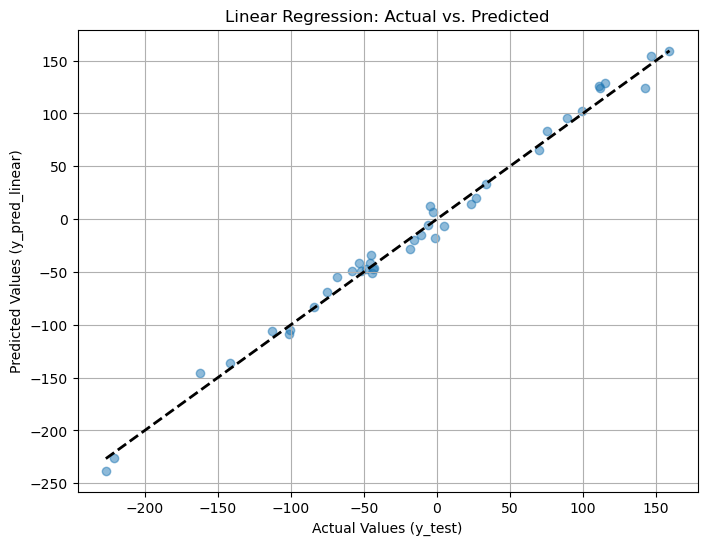

In [5]:
#fitting a linear model and then comparing predicted vs actual for the test data.
import matplotlib.pyplot as plt
import numpy as np

# Plotting predicted vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_linear, alpha=0.5)
plt.title('Linear Regression: Actual vs. Predicted')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred_linear)')
plt.grid(True)

# Add a line for perfect prediction
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

In [6]:
from sklearn.tree import DecisionTreeRegressor

# Create a Decision Tree Regressor model
# We'll start with a simple one (e.g., default parameters)
tree_model = DecisionTreeRegressor(random_state=42)

# Train the model on the training data
tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_tree = tree_model.predict(X_test)

# Calculate the Mean Squared Error (MSE) on the test set
mse_tree = mean_squared_error(y_test, y_pred_tree)

print(f"Decision Tree Regression Test MSE (default depth): {mse_tree}")

Decision Tree Regression Test MSE (default depth): 2214.128780768896


In [7]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Define a range of tree depths to explore
depths = range(1, 21) # Let's try depths from 1 to 20

# Lists to store the MSE for each depth
train_errors = []
test_errors = []

# Iterate through the depths, train a model, and calculate errors
for depth in depths:
    # Create a Decision Tree Regressor with the current max_depth
    tree_model = DecisionTreeRegressor(max_depth=depth, random_state=42)

    # Train the model on the training data
    tree_model.fit(X_train, y_train)

    # Make predictions on the training and test sets
    y_pred_train = tree_model.predict(X_train)
    y_pred_test = tree_model.predict(X_test)

    # Calculate MSE for training and test sets
    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)

    # Store the errors
    train_errors.append(train_mse)
    test_errors.append(test_mse)

print("Finished training models for different depths and calculating errors.")

Finished training models for different depths and calculating errors.


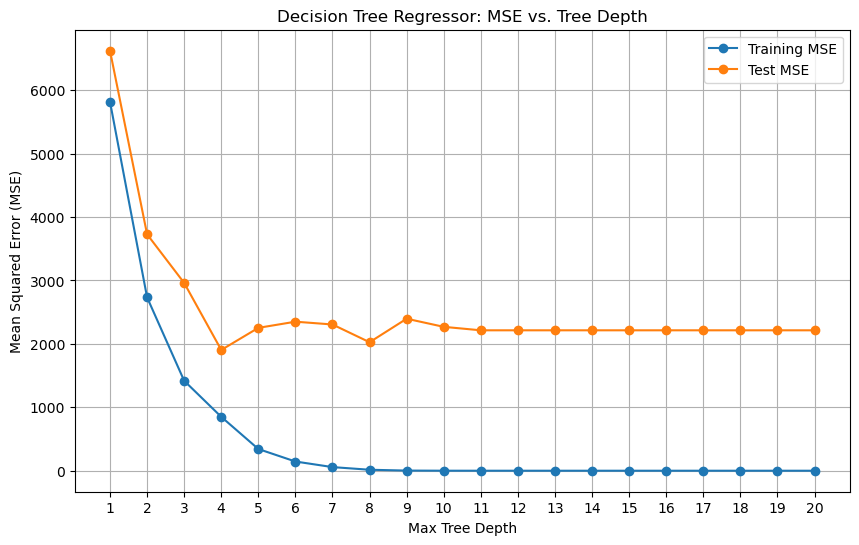

In [8]:
# Plot the training and test errors
plt.figure(figsize=(10, 6))
plt.plot(depths, train_errors, marker='o', linestyle='-', label='Training MSE')
plt.plot(depths, test_errors, marker='o', linestyle='-', label='Test MSE')

plt.title('Decision Tree Regressor: MSE vs. Tree Depth')
plt.xlabel('Max Tree Depth')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(depths) # Ensure all depths are shown on the x-axis
plt.grid(True)
plt.legend()
plt.show()

(e) Using the plot, explain how the bias–variance trade-off is illustrated. to what depth do you see signs of overfitting?

We see signs of overfitting beyond depth =4  where training MSE continues decreasing but test MSE starts increasing. this is a classic case of model getting more complex to hug the training data but can't fit unseen test data. so model is getting overly complex at this stage causing overfitting.



(f) Discuss under what conditions the flexible method outperforms the inflexible one, and vice versa.

Ans: In this case , linear model MSE(85) is significantly lower than the flexible model which at the best is about 2000. Flexible method would outperform the inflexible one only when the underlying data is truly non-linear to a high degree(then any linear model is unlikely to fit well).  Since we are using a regression data under the hood), flexible model is unlikely to be better here.